In [1]:
#More efficient parameter tuning using gridsearch cv instead of looping through cross-validation with different parameters
from sklearn.grid_search import GridSearchCV
#define the pamameters that will be searched
k_range=list(range(1, 31))
print (k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [2]:
#create a pameter grid: map the paramater names to the values that should be searched
param_grid=dict(n_neighbors=k_range)
print (param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [3]:
#instantiate the grid
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k_range)
grid=GridSearchCV(knn, param_grid, cv=10, scoring="accuracy")

In [4]:
#fit the grid with data

from sklearn.datasets import load_iris
iris=load_iris()
x=iris.data
y=iris.target
grid.fit(x, y)
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [5]:
print (grid.grid_scores_[0].parameters)
print (grid.grid_scores_[0].cv_validation_scores)
print (grid.grid_scores_[0].mean_validation_score)

{'n_neighbors': 1}
[ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.86666667  1.          1.          1.        ]
0.96


In [6]:
grid_mean_scores=[result.mean_validation_score for result in grid.grid_scores_]
print (grid_mean_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.97999999999999998, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97999999999999998, 0.97333333333333338, 0.97999999999999998, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.95999999999999996, 0.96666666666666667, 0.95999999999999996, 0.96666666666666667, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


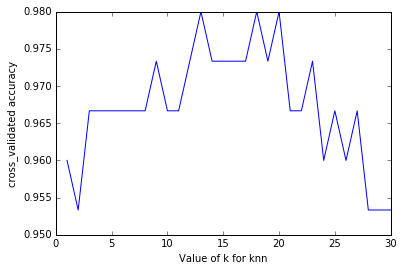

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, grid_mean_scores)
plt.xlabel("Value of k for knn")
plt.ylabel("cross_validated accuracy")

In [8]:
#examine the best model
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


# searching multiple parameters simultaneously

In [24]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

In [25]:
param_grid = dict(weights=weight_options, n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [28]:
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [13]:
print (grid.best_score_)
print (grid.best_params_)

0.98
{'n_neighbors': 13}


# Reducing computational expense using randomized searchcv

In [29]:
#searching many different parameters at once maybe computationally infeasible
#randomizedSearchCV searches a subset of the parameters, and you control the computational budget
from sklearn.grid_search import RandomizedSearchCV

In [31]:
param_dist=dict(n_neighbors=k_range, weights=weight_options)

In [35]:
rand=RandomizedSearchCV(knn, param_dist, cv=10, scoring="accuracy", n_iter=10, random_state=5)
rand.fit(x, y)
rand.grid_scores_

[mean: 0.97333, std: 0.03266, params: {'n_neighbors': 18, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8, 'weights': 'uniform'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 24, 'weights': 'distance'},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 20, 'weights': 'uniform'},
 mean: 0.95333, std: 0.04269, params: {'n_neighbors': 28, 'weights': 'uniform'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 19, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 20, 'weights': 'distance'}]

In [36]:
print (rand.best_score_)
print (rand.best_params_)

0.98
{'n_neighbors': 20, 'weights': 'uniform'}


In [40]:
#randomizedsearchCV might not always find the best score every time as it proved in the following experiment
#out of 20 times randomizedsearch, most of the times it can derive the 0.98 score)
best_scores=[]
for _ in range(20):
    rand=RandomizedSearchCV(knn, param_dist, cv=10, scoring="accuracy", n_iter=10)
    rand.fit(x, y)
    best_scores.append(round(rand.best_score_, 3))
print (best_scores)

[0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97299999999999998, 0.97999999999999998, 0.97999999999999998, 0.97299999999999998, 0.97999999999999998, 0.97299999999999998, 0.97999999999999998, 0.97999999999999998, 0.97299999999999998, 0.97999999999999998, 0.97999999999999998, 0.97299999999999998, 0.97299999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998]
